In [1]:
import numpy as np
import cv2 # OpenCV-Python
import pandas as pd
from pandas import Series
%matplotlib inline
import matplotlib.pyplot as plt


# 1. Sobel と Scharr 微分

Sobel演算子は、Gaussianによる平滑化と微分演算子を組み合わせた演算子で，ノイズに対する耐性がある．

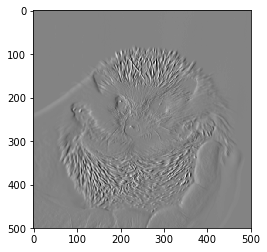

In [3]:
img = cv2.imread('../../img/hari.jpg',0)
img = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
plt.plot(), plt.imshow(img,cmap = 'gray')
plt.show()

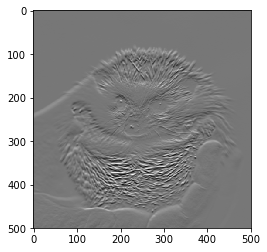

In [4]:
img = cv2.imread('../../img/hari.jpg',0)
img = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.plot(), plt.imshow(img,cmap = 'gray')
plt.show()

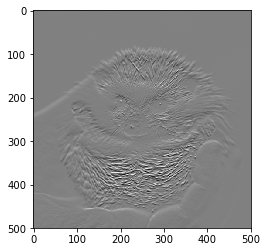

In [6]:
img = cv2.imread('../../img/hari.jpg',0)
img = cv2.Scharr(img,cv2.CV_64F,0,1)
plt.plot(), plt.imshow(img,cmap = 'gray')
plt.show()

# 2. Laplacian微分

式に基づいて画像のLaplacian(2次微分)を計算

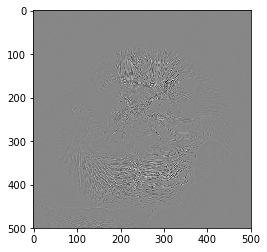

In [8]:
img = cv2.imread('../../img/hari.jpg',0)
img = cv2.Laplacian(img,cv2.CV_64F,0,1)
plt.plot(), plt.imshow(img,cmap = 'gray')
plt.show()

# 重要ポイント

上のコードでは出力画像の型を cv2.CV_8U もしくは np.uint8 としているが，実はちょっとした問題がある．黒から白への変化(画素値の低い値から高い値への変化)は正方向の傾きとして計算されるが，白から黒への変化(画素値の高い値から低い値への変化)は負の傾きとして計算される．そのため，勾配を np.uint8 へ変換すると，負の値は全て0になってしまう、つまり，負の勾配を失ってしまうという問題がある．

正負両方のエッジを検出したいのであれば，画素値の型を cv2.CV_16S や cv2.CV_64F といった、より高次のものに変更する．次のコードは横方向のSobelフィルタを例に，画素値の型の違いが結果に及ぼす影響を示す．

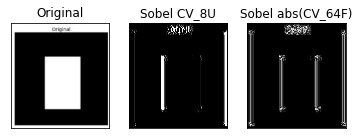

In [9]:
img = cv2.imread('../../img/box.png',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()